<a href="https://colab.research.google.com/github/abembmyum/Crypto-Price-Analysis/blob/main/XRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=03d066c1d9013055fbc0ab73f7c938290f543439d5729ea09bfe9059289dbeb8
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas_ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
import pandas_ta as pta
%matplotlib inline

In [ ]:
xrp_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-HYltuu-hF7viuxmVOfQS1Q9VK-xmL7g')
xrp_df.head()

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,ignore
0,1669852800000,0.4078,0.4093,0.3944,0.3969,251203503.0,1669939199999,1.003814e+08,141670,133397950.0,5.329631e+07,0
1,1669939200000,0.3968,0.3975,0.3838,0.3961,257877078.0,1670025599999,1.005551e+08,137052,138441788.0,5.397062e+07,0
2,1670025600000,0.3961,0.3973,0.3853,0.3873,152919238.0,1670111999999,5.997445e+07,87264,73047643.0,2.865730e+07,0
3,1670112000000,0.3873,0.3932,0.3860,0.3895,134434499.0,1670198399999,5.239972e+07,80207,65279404.0,2.544793e+07,0
4,1670198400000,0.3895,0.3954,0.3800,0.3893,338205071.0,1670284799999,1.320610e+08,169162,176414438.0,6.890021e+07,0


In [ ]:
#Convert Unix Dates to DateTime
xrp_df['open time']=pd.to_datetime(xrp_df['open time'], unit='ms')

#drop close time as it is not needed for now
xrp_df.drop('close time', axis=1, inplace=True)
#drop ignore column
xrp_df.drop('ignore', axis=1, inplace=True)

#Set the open time as index
xrp_df.set_index('open time', inplace=True)

#sort by date(index)
xrp_df.sort_index(inplace=True)

xrp_df.head()

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
open time,,,,,,,,,
2018-05-04,0.50000,1.50000,0.50000,0.88990,20890213.82,1.894672e+07,37492,8580293.34,7.765706e+06
2018-05-05,0.88980,0.93500,0.88800,0.90280,16816165.30,1.528200e+07,26476,8057022.91,7.321986e+06
2018-05-06,0.90280,0.91800,0.83774,0.86483,16002035.80,1.399714e+07,28713,7105353.54,6.202721e+06
2018-05-07,0.86482,0.86886,0.80000,0.82490,17303486.40,1.419228e+07,29174,7663873.06,6.270763e+06
2018-05-08,0.82490,0.84802,0.79200,0.80667,12971303.18,1.057184e+07,23010,5941956.44,4.847940e+06


In [ ]:
#See DF info and show Duplicate rows
xrp_df.info()
print("Duplicate rows = ",len(xrp_df[xrp_df.duplicated(keep=False)]))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1703 entries, 2018-05-04 to 2022-12-31
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          1703 non-null   float64
 1   high                          1703 non-null   float64
 2   low                           1703 non-null   float64
 3   close                         1703 non-null   float64
 4   volume                        1703 non-null   float64
 5   quote asset volume            1703 non-null   float64
 6   number of trades              1703 non-null   int64  
 7   taker buy base asset volume   1703 non-null   float64
 8   taker buy quote asset volume  1703 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 133.0 KB
Duplicate rows =  0


In [ ]:
# Look for missing values
xrp_df.isnull()
print("Missing values in column: \n", xrp_df.isnull().sum())

Missing values in column: 
 open                            0
high                            0
low                             0
close                           0
volume                          0
quote asset volume              0
number of trades                0
taker buy base asset volume     0
taker buy quote asset volume    0
dtype: int64


In [ ]:
xrp_df.var()

open                            8.778188e-02
high                            9.918958e-02
low                             7.651188e-02
close                           8.778819e-02
volume                          2.842294e+17
quote asset volume              1.873284e+17
number of trades                1.902369e+11
taker buy base asset volume     7.026138e+16
taker buy quote asset volume    4.678298e+16
change                          1.531422e-03
gain                            6.926911e-04
loss                            6.461844e-04
rsi                             1.414439e+02
dtype: float64

In [ ]:
#start adding additional Columns for RSI
#Add Change column
xrp_df['change'] = xrp_df['close'].diff(1)

#Add gain & loss columns from change
xrp_df['gain'] = xrp_df[xrp_df['change']>0]['change']
xrp_df['gain'] = xrp_df['gain'].fillna(0)

xrp_df['loss'] = xrp_df[xrp_df['change']<0]['change']
xrp_df['loss'] = xrp_df['loss']*-1
xrp_df['loss'] = xrp_df['loss'].fillna(0)

#Use python TA to calculate RSI
xrp_df['rsi']=pta.rsi(xrp_df['close'],length = 14)
xrp_df.head(20)

xrp_df.head(20)

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,change,gain,loss,rsi
open time,,,,,,,,,,,,,
2018-05-04,0.50000,1.50000,0.50000,0.88990,20890213.82,1.894672e+07,37492,8580293.34,7.765706e+06,NaN,0.00000,0.00000,NaN
2018-05-05,0.88980,0.93500,0.88800,0.90280,16816165.30,1.528200e+07,26476,8057022.91,7.321986e+06,0.01290,0.01290,0.00000,NaN
2018-05-06,0.90280,0.91800,0.83774,0.86483,16002035.80,1.399714e+07,28713,7105353.54,6.202721e+06,-0.03797,0.00000,0.03797,NaN
2018-05-07,0.86482,0.86886,0.80000,0.82490,17303486.40,1.419228e+07,29174,7663873.06,6.270763e+06,-0.03993,0.00000,0.03993,NaN
2018-05-08,0.82490,0.84802,0.79200,0.80667,12971303.18,1.057184e+07,23010,5941956.44,4.847940e+06,-0.01823,0.00000,0.01823,NaN
2018-05-09,0.80667,0.81894,0.75690,0.79481,13982375.89,1.101481e+07,26971,6959966.53,5.481455e+06,-0.01186,0.00000,0.01186,NaN
2018-05-10,0.79481,0.80572,0.74085,0.74558,10136895.73,7.949198e+06,20175,4439818.93,3.482183e+06,-0.04923,0.00000,0.04923,NaN
2018-05-11,0.74920,0.75602,0.64758,0.67610,31292480.04,2.161134e+07,50248,14712053.67,1.010323e+07,-0.06948,0.00000,0.06948,NaN
2018-05-12,0.67376,0.71000,0.62519,0.68522,18181151.11,1.222389e+07,33907,7997751.67,5.381953e+06,0.00912,0.00912,0.00000,NaN


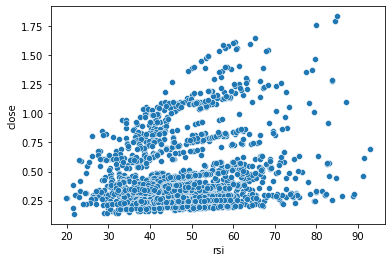

In [ ]:
# Plot the relationship between RSI and close price
sns.scatterplot(x="rsi", y="close", data=xrp_df)
plt.show()

Q. 7

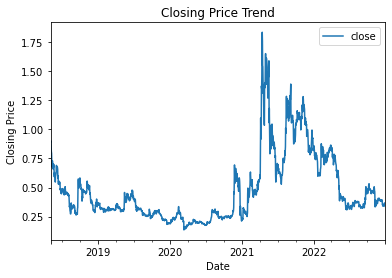

In [ ]:
#Plot closing price
xrp_df.plot(y='close',kind='line')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trend')

#Plot trend for closing price
z = np.polyfit(mdates.date2num(xrp_df.index), xrp_df['close'],1)
p= np.poly1d(z)

plt.plot(mdates.date2num(xrp_df.index), p(mdates.date2num(xrp_df.index)))

plt.show()

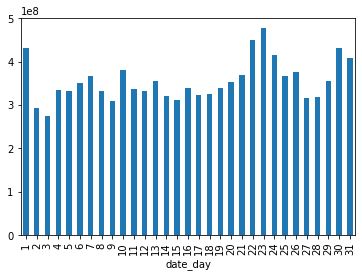

In [ ]:
xrp_df['date_day']=xrp_df.index.day
# Group the data by day of the month and calculate the mean volume
mean_volume_by_day = xrp_df.groupby('date_day')['volume'].mean()
# Plot the mean volume by day of the month
mean_volume_by_day.plot(kind='bar')
plt.show()